<a href="https://colab.research.google.com/github/blessjal/practicums/blob/master/Copy_of_hwk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [8]:
auto = pd.read_csv('/content/sample_data/auto-mpg.data', sep='\s+', names=['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration' , 'model year', 'origin', 'car name'])
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [9]:
auto.shape

(398, 9)

**1(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median and a 0 if mpg contains a value below its medi**an

In [10]:
mpg_med = auto.mpg.median()
auto['mpg01'] = np.where(auto.mpg > mpg_med, 1, 0)

In [11]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg01
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0


**1(b) Explore the data graphically in orderto investigate the association between mpg01 and the other features using scatterplots and boxplots. Describe your findings.**

In [17]:
auto.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,mpg01
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,0.837419
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,-0.736711
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,-0.736608
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,-0.745046
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,0.316618
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,0.448150
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,0.512200
mpg01,0.837419,-0.736711,-0.736608,-0.745046,0.316618,0.448150,0.512200,1.000000


In [ ]:
sns.pairplot(auto, hue='mpg01', palette='set2')

In [20]:
auto['horsepower'] = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype('int64')

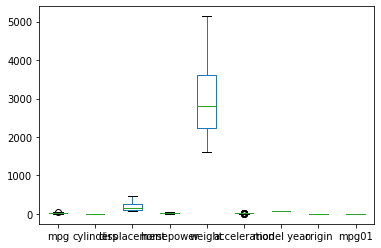

In [23]:
auto.plot(kind='box')


**Data Processing **

**1(c) Split the dat into a training set and test set**

In [24]:
X = auto.drop(['mpg01', 'car name', 'origin', 'model year'], axis=1)
y = auto['mpg01']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 6)
(80, 6)
(318,)
(80,)


**Transform data using StandardScalar()**

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**1(d) Perform a logistic regression on the training data in order to predict mpg01 using variables that seemed most associated with mpg01. Calculate the test error.**

In [27]:
lr = LogisticRegression()
lr_fit = lr.fit(X_train, y_train)

In [28]:
y_pred = lr.predict(X_test)

In [29]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [30]:
y_test

65     0
132    1
74     0
78     0
37     0
      ..
269    1
235    1
145    1
196    1
124    0
Name: mpg01, Length: 80, dtype: int64

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the logistic regression model is: ', accuracy)

The accuracy of the logistic regression model is:  0.95


In [32]:
mse = mean_squared_error(y_test, y_pred)
mse

0.05

In [33]:
error = np.sqrt(mse)

print('The error of the logistic regression model is:', error)

The error of the logistic regression model is: 0.22360679774997896


In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  3],
       [ 1, 36]])

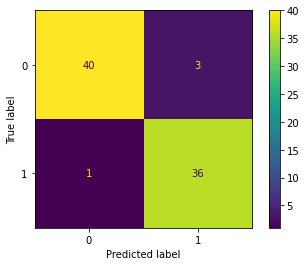

In [35]:
from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(lr_fit, X_test, y_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.92      0.97      0.95        37

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



**1(e) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation error associated with differnt values of this parameter.**

In [44]:
from sklearn import svm
from sklearn.svm import SVC
import random

# C=1
svm_model = SVC(C=1)
svm_model_fit = svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('The accuracy of the svm model is ', svm_accuracy)

The accuracy of the svm model is  0.9625


In [43]:
# C=5
svm_model = SVC(C=5)
svm_model_fit = svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('The accuracy of the svm model is ', svm_accuracy)

The accuracy of the svm model is  0.9875


In [42]:
# C=10
svm_model = SVC(C=10)
svm_model_fit = svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('The accuracy of the svm model is ', svm_accuracy)

The accuracy of the svm model is  0.975


In [41]:
# C=15
svm_model = SVC(C=15)
svm_model_fit = svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('The accuracy of the svm model is ', svm_accuracy)

The accuracy of the svm model is  0.975


In [45]:
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(estimator=svm_model, X=X_train, y=y_train, cv=5)

cv_accuracy

array([0.984375  , 0.953125  , 0.984375  , 0.96825397, 0.98412698])

In [46]:
print('The mean accuracy of the cross_validation is', cv_accuracy.mean())

The mean accuracy of the cross_validation is 0.9748511904761905


In [59]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 5, 10, 15], 'degree': [1, 2, 3, 4]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
gd_sr = GridSearchCV(estimator=svc, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

clf.cv_results_

{'mean_fit_time': array([0.00185399, 0.00137153, 0.00104723, 0.00151863, 0.0010653 ,
        0.00131593, 0.00231452, 0.00151253, 0.00097713, 0.001402  ,
        0.00129714, 0.00158601, 0.00101209, 0.00147748, 0.00263319,
        0.00153637, 0.00112257, 0.00132494, 0.00098281, 0.00119963,
        0.00104852, 0.0012002 , 0.00284715, 0.00121059, 0.00105772,
        0.0012475 , 0.00113354, 0.0011744 , 0.00102592, 0.00120316,
        0.00346093, 0.00127592, 0.00121431, 0.00112748, 0.00110221,
        0.00122542, 0.00117526, 0.00111337, 0.00392342, 0.00126314,
        0.00116606, 0.0011158 , 0.00112872, 0.00118175, 0.00117254,
        0.00111504, 0.00427909, 0.00131221, 0.00115747, 0.00116992,
        0.00103378, 0.00113955, 0.00115547, 0.00116978, 0.00444469,
        0.00123382, 0.00120649, 0.00118027, 0.00112543, 0.00120964,
        0.00119147, 0.00119748, 0.0052361 , 0.00128994]),
 'mean_score_time': array([0.00056438, 0.00050559, 0.00044279, 0.00055461, 0.00048194,
        0.00049877, 0.

In [61]:
print('The best estimator of the model: ', clf.best_estimator_)
print()
print('-'*100)
print('The best index of the model: ', clf.best_index_)
print()
print('-'*100)
print('The best parameter of the model: ', clf.best_params_)
print()
print('-'*100)
print('The best score of the model: ', clf.best_score_)

The best estimator of the model:  SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

----------------------------------------------------------------------------------------------------
The best index of the model:  16

----------------------------------------------------------------------------------------------------
The best parameter of the model:  {'C': 5, 'degree': 1, 'kernel': 'linear'}

----------------------------------------------------------------------------------------------------
The best score of the model:  0.9843253968253969


**1(f) Repeat the previous item but this time using SVMs with radial and polynomial basis kernels with different values of** *gamma*, *degree* and *costs*. 

In [62]:
# Polynomial Model
svc_polynomial = SVC(kernel='poly', degree=5)
svc_polynomial_fit = svc_polynomial.fit(X_train, y_train)

svc_polynomial_pred = svc_polynomial.predict(X_test)
svc_polynomial_accuracy = accuracy_score(y_test, svc_polynomial_pred)
print('The accuracy of the polynomial model is ', svc_polynomial_accuracy)


The accuracy of the polynomial model is  0.8375


In [63]:
# Polynomial Model with C=5 and gamma= 'auto'
svc_polynomial = SVC(C=5, kernel='poly', degree=5, gamma='auto')
svc_polynomial_fit = svc_polynomial.fit(X_train, y_train)

svc_polynomial_pred = svc_polynomial.predict(X_test)
svc_polynomial_accuracy = accuracy_score(y_test, svc_polynomial_pred)
print('The accuracy of the polynomial model with gamma=auto is ', svc_polynomial_accuracy)


The accuracy of the polynomial model with gamma=auto is  0.85


In [64]:
# Gaussian Model
svc_gaussian = SVC(kernel='rbf')
svc_gaussian_fit = svc_gaussian.fit(X_train, y_train)

svc_gaussian_pred = svc_gaussian.predict(X_test)
svc_gaussian_accuracy = accuracy_score(y_test, svc_gaussian_pred)
print('The accuracy of the gaussian model is ', svc_gaussian_accuracy)


The accuracy of the gaussian model is  0.9625


In [65]:
# Gaussian Model with C=10 and gamma='auto'
svc_gaussian = SVC(C=10, kernel='rbf', gamma='auto')
svc_gaussian_fit = svc_gaussian.fit(X_train, y_train)

svc_gaussian_pred = svc_gaussian.predict(X_test)
svc_gaussian_accuracy = accuracy_score(y_test, svc_gaussian_pred)
print('The accuracy of the gaussian model is ', svc_gaussian_accuracy)


The accuracy of the gaussian model is  0.975


In [66]:
# Sigmoid Model
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid_fit = svc_sigmoid.fit(X_train, y_train)

svc_sigmoid_pred = svc_sigmoid.predict(X_test)
svc_sigmoid_accuracy = accuracy_score(y_test, svc_sigmoid_pred)
print('The accuracy of the sigmoid model is ', svc_sigmoid_accuracy)


The accuracy of the sigmoid model is  0.95


In [67]:
# Sigmoid Model with C=15 and gamma='auto'
svc_sigmoid = SVC(C=15, kernel='sigmoid', gamma='auto')
svc_sigmoid_fit = svc_sigmoid.fit(X_train, y_train)

svc_sigmoid_pred = svc_sigmoid.predict(X_test)
svc_sigmoid_accuracy = accuracy_score(y_test, svc_sigmoid_pred)
print('The accuracy of the sigmoid model (C=15 and gamma=auto) is ', svc_sigmoid_accuracy)

The accuracy of the sigmoid model (C=15 and gamma=auto) is  0.95


**2. Using the *College* data set, provide a solution for the following questions**

(a) Split the data into a training set and a test set

In [ ]:
df = pd.read_csv('/content/sample_data/College.txt')

df.head()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.set_index('Unnamed: 0', inplace=True)

In [ ]:
df['Private'] = np.where(df.Private == 'Yes', 1, 0)
df['Private'].value_counts()

In [ ]:
X = df.drop('Grad.Rate', axis=1)
y = df['Grad.Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

**2(b) Fit a linear model using least squares on the training set and report the test error obtained.**

In [ ]:
lrMod = LinearRegression()
lrMod_fit = lrMod.fit(X_train, y_train)
lrMod_pred = lrMod_fit.predict(X_test)
lrMod_pred[:10]

In [ ]:
mse = mean_squared_error(y_test, lrMod_pred)
ols_error = np.sqrt(mse)
print('The error of the ols model is ', ols_error)

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X_train.values)
y = y_train
mod = sm.OLS(y, X)
results = mod.fit()
print(results.summary())

In [ ]:
print('The Parameters of the OLS model: ', results.params)
print()
print('-'*100)
print('The Standard Errors of the OLS model: ', results.bse)
print()
print('-'*100)
print('The R^2 of the OLS model: ', results.rsquared)
print()
print('-'*100)
print('First 10 Predicted values: ', results.predict()[:10])

**Remove factors that are not contributing to the model**

In [ ]:
df1 =df.copy()
X1 = df1.drop(['Enroll', 'Top10perc', 'Top25perc', 'Personal', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Grad.Rate'], axis=1)
y1 = df1['Grad.Rate']

print(X1.shape)
print(y1.shape)
print()
print('-'*100)
df1['Private'] = np.where(df1.Private == 'Yes', 1, 0)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=10)

X1 = sm.add_constant(X1_train.values)
y1 = y1_train
mod = sm.OLS(y1, X1)
results = mod.fit()
print(results.summary())

**Remove factors that are not contributing to the model**

In [ ]:
df1 =df.copy()
X1 = df1.drop(['Enroll', 'Top10perc', 'Top25perc', 'Personal', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Grad.Rate', 'P.Undergrad', 'PhD', 'perc.alumni'], axis=1)
y1 = df1['Grad.Rate']

print(X1.shape)
print(y1.shape)
print()
print('-'*100)
df1['Private'] = np.where(df1.Private == 'Yes', 1, 0)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=10)

X1 = sm.add_constant(X1_train.values)
y1 = y1_train
mod = sm.OLS(y1, X1)
results = mod.fit()
print(results.summary())

**Remove factors that are not contributing to the model**

In [ ]:
df1 =df.copy()
X1 = df1.drop(['Enroll', 'Top10perc', 'Top25perc', 'Personal', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Grad.Rate', 'Private', 'F.Undergrad', 'Room.Board', 'Books'], axis=1)
y1 = df1['Grad.Rate']

print(X1.shape)
print(y1.shape)
print()
print('-'*100)
df1['Private'] = np.where(df1.Private == 'Yes', 1, 0)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=10)

X1 = sm.add_constant(X1_train.values)
y1 = y1_train
mod = sm.OLS(y1, X1)
results = mod.fit()
print(results.summary())

In [ ]:
print('The Parameters of the final OLS model: ', results.params)
print()
print('-'*100)
print('The Standard Errors of the final OLS model: ', results.bse)
print()
print('-'*100)
print('The R^2 of the final OLS model: ', results.rsquared)
print()
print('-'*100)
print('First 10 Predicted values: ', results.predict()[:10])

**2(c) Fit a ridge regression model on the training set, with lambda chosen by cross-validation. Report the test error obtained.**

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold

# define the cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the model
model = RidgeCV(alphas=np.arange(0, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')

# fit the model
modFit = model.fit(X_train, y_train)

# display the lambda that produced the lowest test MSE
print('The lambda that produced the least MSE is ', model.alpha_)

# error
mod_mse = mean_squared_error(y_test, modFit.predict(X_test))
modError = np.sqrt(mod_mse)
print('The error of the model is ', modError)

**2(d) Fit a lasso model on the training set, with lambda chosen by corss-validation. Report the test error obtained along wit hthe number of non-zero coefficients.** 

In [ ]:
from sklearn.linear_model import LassoCV

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = LassoCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
model_fit = model.fit(X_train, y_train)

# display the lambda that produced the lowest test MSE
print('The lambda that produced the least MSE is ', model.alpha_)

# error
model_mse = mean_squared_error(y_test, model_fit.predict(X_test))
modelError = np.sqrt(mod_mse)
print('The error of the model is ', modelError)

In [ ]:
non_zero_coefficients = np.sum(model.coef_ !=0)
print('The number of non-zero coefficients of the model is', non_zero_coefficients)